## Check Request Response For API link

In [40]:
import re
import requests
import json
import pprint
import matplotlib.pyplot as plt

url = "https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/financial/monetary-statistics"

res = requests.get(url) #200 means success

print(res)


<Response [200]>


## Apply Json method to parse valid Json string and convert to a Python dictionary

In [41]:
import json
answer = json.loads(res.text)
answer

{'header': {'success': True, 'err_code': '0000', 'err_msg': 'No error found'},
 'result': {'datasize': 20,
  'records': [{'end_of_month': '2022-09',
    'notes_coins_circulation': 618252,
    'aggr_balance': 123336,
    'ef_bills_notes': 1189978,
    'monetary_base_total': 1931566,
    'm1_total': None,
    'm1_hkd': None,
    'm2_total': None,
    'm2_hkd': None,
    'm3_total': None,
    'm3_hkd': None,
    'exrate_hkd_usd': 7.851,
    'nominal_eff_exrate_index': 105.3383,
    'hibor_fixing_overnight': 2.26196,
    'hibor_fixing_3m': 3.33327,
    'deposit_rate_saving': 0.1095,
    'deposit_rate_3m': 0.04625,
    'yield_efpaper_3m': 2.79,
    'yield_govbond_10y': 3.568,
    'best_lending_rate': 5.125,
    'discount_window_base_rate': 3.5},
   {'end_of_month': '2022-08',
    'notes_coins_circulation': 616671,
    'aggr_balance': 125024,
    'ef_bills_notes': 1188629,
    'monetary_base_total': 1930324,
    'm1_total': 3167350.117,
    'm1_hkd': 1967013.06,
    'm2_total': 16338977.93,


## Filtered to useful dataset

In [42]:
list_dict = answer['result']['records']
list_dict

[{'end_of_month': '2022-09',
  'notes_coins_circulation': 618252,
  'aggr_balance': 123336,
  'ef_bills_notes': 1189978,
  'monetary_base_total': 1931566,
  'm1_total': None,
  'm1_hkd': None,
  'm2_total': None,
  'm2_hkd': None,
  'm3_total': None,
  'm3_hkd': None,
  'exrate_hkd_usd': 7.851,
  'nominal_eff_exrate_index': 105.3383,
  'hibor_fixing_overnight': 2.26196,
  'hibor_fixing_3m': 3.33327,
  'deposit_rate_saving': 0.1095,
  'deposit_rate_3m': 0.04625,
  'yield_efpaper_3m': 2.79,
  'yield_govbond_10y': 3.568,
  'best_lending_rate': 5.125,
  'discount_window_base_rate': 3.5},
 {'end_of_month': '2022-08',
  'notes_coins_circulation': 616671,
  'aggr_balance': 125024,
  'ef_bills_notes': 1188629,
  'monetary_base_total': 1930324,
  'm1_total': 3167350.117,
  'm1_hkd': 1967013.06,
  'm2_total': 16338977.93,
  'm2_hkd': 8109954.302,
  'm3_total': 16371791.216,
  'm3_hkd': 8123195.847,
  'exrate_hkd_usd': 7.848,
  'nominal_eff_exrate_index': 102.4749,
  'hibor_fixing_overnight': 1.1

## Build up Python Dictionary by list comprehension to prepare for creating DataFrame

In [43]:
d = {'end_of_month': [item['end_of_month'] for item in list_dict],
  'notes_coins_circulation': [item['notes_coins_circulation'] for item in list_dict],
  #'aggr_balance': [item['aggr_balance'] for item in list_dict],
  #'ef_bills_notes': [item['ef_bills_notes'] for item in list_dict],
  #'monetary_base_total': [item['monetary_base_total'] for item in list_dict],
  #'m1_total': [item['m1_total'] for item in list_dict],
  #'m1_hkd': [item['m1_hkd'] for item in list_dict],
  #'m2_total': [item['m2_total'] for item in list_dict],
  #'m2_hkd': [item['m2_hkd'] for item in list_dict],
  #'m3_total': [item['m3_total'] for item in list_dict],
  #'m3_hkd': [item['m3_hkd'] for item in list_dict],
  'exrate_hkd_usd': [item['exrate_hkd_usd'] for item in list_dict],
  #'nominal_eff_exrate_index': [item['nominal_eff_exrate_index'] for item in list_dict],
  'hibor_fixing_overnight': [item['hibor_fixing_overnight'] for item in list_dict],
  'hibor_fixing_3m': [item['hibor_fixing_3m'] for item in list_dict],
  #'deposit_rate_saving': [item['deposit_rate_saving'] for item in list_dict],
  #'deposit_rate_3m': [item['deposit_rate_3m'] for item in list_dict],
  #'yield_efpaper_3m': [item['yield_efpaper_3m'] for item in list_dict],
  #'yield_govbond_10y': [item['yield_govbond_10y'] for item in list_dict],
  #'best_lending_rate': [item['best_lending_rate'] for item in list_dict],
  #'discount_window_base_rate': [item['discount_window_base_rate'] for item in list_dict]
}


In [44]:
type(d)

dict

In [45]:
d

{'end_of_month': ['2022-09',
  '2022-08',
  '2022-07',
  '2022-06',
  '2022-05',
  '2022-04',
  '2022-03',
  '2022-02',
  '2022-01',
  '2021-12',
  '2021-11',
  '2021-10',
  '2021-09',
  '2021-08',
  '2021-07',
  '2021-00',
  '2020-00',
  '2019-00',
  '2018-00',
  '2017-00'],
 'notes_coins_circulation': [618252,
  616671,
  623918,
  626793,
  619271,
  626925,
  621073,
  623192,
  635040,
  606030,
  594032,
  590884,
  592153,
  588865,
  589211,
  606030,
  572688,
  529859,
  496690,
  460426],
 'exrate_hkd_usd': [7.851,
  7.848,
  7.851,
  7.847,
  7.849,
  7.847,
  7.831,
  7.814,
  7.798,
  7.798,
  7.802,
  7.779,
  7.789,
  7.783,
  7.773,
  7.798,
  7.753,
  7.787,
  7.834,
  7.814],
 'hibor_fixing_overnight': [2.26196,
  1.18619,
  0.93774,
  1.43476,
  0.09554,
  0.05583,
  0.08696,
  0.11036,
  0.13929,
  0.05566,
  0.06179,
  0.04196,
  0.03929,
  0.0381,
  0.04613,
  0.05566,
  0.04071,
  4.56226,
  4.60393,
  1.34],
 'hibor_fixing_3m': [3.33327,
  2.6528,
  2.2,
  1.75

## Create Dataframe by Pandas library

In [46]:
import pandas as pd 

df = pd.DataFrame(d)
df

,end_of_month,notes_coins_circulation,exrate_hkd_usd,hibor_fixing_overnight,hibor_fixing_3m
0,2022-09,618252,7.851,2.26196,3.33327
1,2022-08,616671,7.848,1.18619,2.65280
2,2022-07,623918,7.851,0.93774,2.20000
3,2022-06,626793,7.847,1.43476,1.75226
4,2022-05,619271,7.849,0.09554,0.89738
5,2022-04,626925,7.847,0.05583,0.72875
6,2022-03,621073,7.831,0.08696,0.55476
7,2022-02,623192,7.814,0.11036,0.43792
8,2022-01,635040,7.798,0.13929,0.33042
9,2021-12,606030,7.798,0.05566,0.25875


## Inspect and Clean Data

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   end_of_month             20 non-null     object 
 1   notes_coins_circulation  20 non-null     int64  
 2   exrate_hkd_usd           20 non-null     float64
 3   hibor_fixing_overnight   20 non-null     float64
 4   hibor_fixing_3m          20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [48]:
df = df.drop(index=[15,16,17,18,19], axis=0) # delete inconsistent data which should be monthly
df

,end_of_month,notes_coins_circulation,exrate_hkd_usd,hibor_fixing_overnight,hibor_fixing_3m
0,2022-09,618252,7.851,2.26196,3.33327
1,2022-08,616671,7.848,1.18619,2.65280
2,2022-07,623918,7.851,0.93774,2.20000
3,2022-06,626793,7.847,1.43476,1.75226
4,2022-05,619271,7.849,0.09554,0.89738
5,2022-04,626925,7.847,0.05583,0.72875
6,2022-03,621073,7.831,0.08696,0.55476
7,2022-02,623192,7.814,0.11036,0.43792
8,2022-01,635040,7.798,0.13929,0.33042
9,2021-12,606030,7.798,0.05566,0.25875


In [49]:
df['end_of_month']= pd.to_datetime(df['end_of_month'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   end_of_month             15 non-null     datetime64[ns]
 1   notes_coins_circulation  15 non-null     int64         
 2   exrate_hkd_usd           15 non-null     float64       
 3   hibor_fixing_overnight   15 non-null     float64       
 4   hibor_fixing_3m          15 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 728.0 bytes


In [51]:
df.sort_values(by='end_of_month', ascending=True, inplace=True)
df

,end_of_month,notes_coins_circulation,exrate_hkd_usd,hibor_fixing_overnight,hibor_fixing_3m
14,2021-07-01,589211,7.773,0.04613,0.14875
13,2021-08-01,588865,7.783,0.03810,0.15149
12,2021-09-01,592153,7.789,0.03929,0.14000
11,2021-10-01,590884,7.779,0.04196,0.15375
10,2021-11-01,594032,7.802,0.06179,0.23512
9,2021-12-01,606030,7.798,0.05566,0.25875
8,2022-01-01,635040,7.798,0.13929,0.33042
7,2022-02-01,623192,7.814,0.11036,0.43792
6,2022-03-01,621073,7.831,0.08696,0.55476
5,2022-04-01,626925,7.847,0.05583,0.72875


In [52]:
df.describe()

,notes_coins_circulation,exrate_hkd_usd,hibor_fixing_overnight,hibor_fixing_3m
count,15.000000,15.000000,15.000000,15.000000
mean,611487.333333,7.817333,0.439437,0.931695
std,16223.275399,0.029961,0.688166,1.041745
min,588865.000000,7.773000,0.038100,0.140000
25%,593092.500000,7.793500,0.050895,0.194435
50%,618252.000000,7.814000,0.086960,0.437920
75%,623555.000000,7.847500,0.538515,1.324820
max,635040.000000,7.851000,2.261960,3.333270


In [53]:
df.to_csv('HK_Monetary_Statistics.csv')

## Investigate insights

In [54]:
x = df['end_of_month']
y = df['notes_coins_circulation']

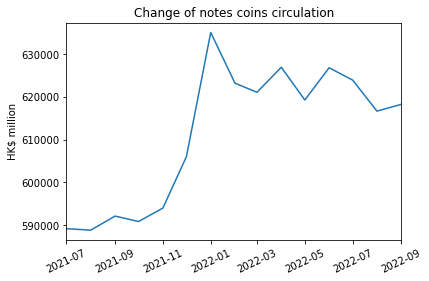

In [55]:
plt.plot(x, y)
plt.xticks(rotation = 25)
plt.xlim(x[len(x)-1], x[0])
plt.ylabel('HK$ million')
plt.title('Change of notes coins circulation')
plt.savefig('Change of notes coins circulation.png')
plt.show()

In [56]:
z = df['exrate_hkd_usd']

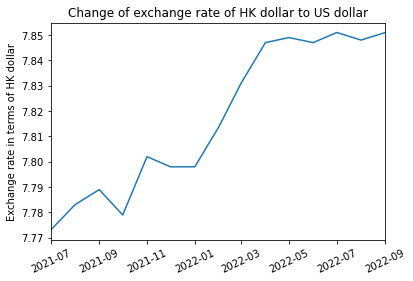

In [57]:
plt.plot(x, z)
plt.xticks(rotation = 25)
plt.xlim(x[len(x)-1], x[0])
plt.ylabel('Exchange rate in terms of HK dollar')
plt.title('Change of exchange rate of HK dollar to US dollar')
plt.savefig('Change of exchange rate of HK dollar to US dollar.png')
plt.show()

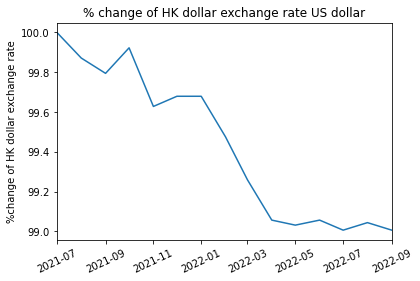

In [58]:
plt.plot(x, z.iloc[0]/z*100)
plt.xticks(rotation = 25)
plt.xlim(x[len(x)-1], x[0])
plt.ylabel('%change of HK dollar exchange rate')
plt.title('% change of HK dollar exchange rate US dollar')
plt.savefig('% change of exchange rate of HK dollar to US dollar.png')
plt.show()

In [59]:
w = df['hibor_fixing_overnight']
t = df['hibor_fixing_3m']

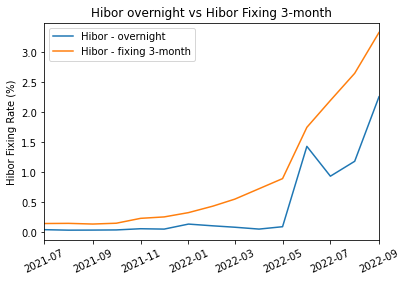

In [60]:
plt.plot(x, w)
plt.plot(x, t)
plt.legend(['Hibor - overnight', 'Hibor - fixing 3-month'])
plt.xticks(rotation = 25)
plt.xlim(x[len(x)-1], x[0])
plt.ylabel('Hibor Fixing Rate (%)')
plt.title('Hibor overnight vs Hibor Fixing 3-month')
plt.savefig('Hibor overnight vs Hibor Fixing 3-month.png')
plt.show()

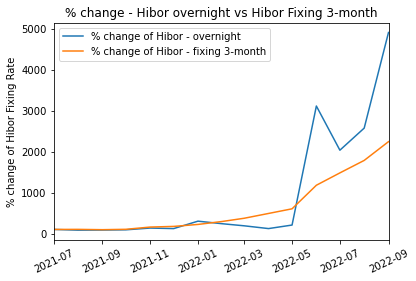

In [61]:
plt.plot(x, w/w.iloc[0]*100)
plt.plot(x, t/t.iloc[0]*100)
plt.legend(['% change of Hibor - overnight', '% change of Hibor - fixing 3-month'])
plt.xticks(rotation = 25)
plt.xlim(x[len(x)-1], x[0])
plt.ylabel('% change of Hibor Fixing Rate')
plt.title('% change - Hibor overnight vs Hibor Fixing 3-month')
plt.savefig('% change of Hibor overnight vs Hibor Fixing 3-month.png')
plt.show()